In [46]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

## Load Data

In [11]:
#tf.data.Dataset.list_files

In [12]:
data_dir = '../Resources/Animals-10'

In [13]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 26179 files belonging to 10 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([7, 4, 5, 3, 2, 8, 3, 8, 7, 6, 1, 2, 2, 6, 7, 4, 0, 6, 7, 4, 9, 4,
       9, 2, 2, 9, 8, 2, 8, 8, 0, 3], dtype=int32)

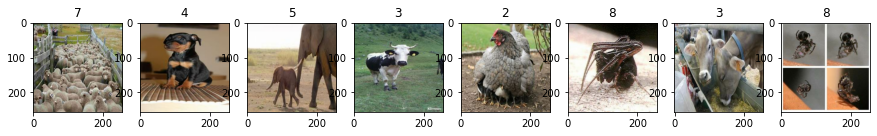

In [18]:
fig, ax = plt.subplots(ncols=8, figsize=(15,15))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# PreProccessing

### Scale Data

In [19]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 26179 files belonging to 10 classes.


In [20]:
data = data.map(lambda x,y: (x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

In [23]:
#If this is not one, then the data did not scale properly
batch[0].max()

1.0

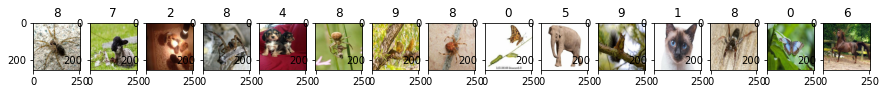

In [24]:
fig, ax = plt.subplots(ncols=15, figsize=(15,15))
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [25]:
#NUMBER OF BATCHES OF DATA, 100% OF DATA
len(data)

819

In [26]:
#Splitting 819 into train and test (only using half of dataset)
train_size = int(len(data)/2*.7)+1
val_size=int(len(data)/2*.2)
test_size=int(len(data)/2*.1)+1

In [27]:
train_size + val_size + test_size

409

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
tf.autograph.set_verbosity(
    level=0, alsologtostdout=False
)

# Deep model

## Build deep learning Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(128, (3,3),1, activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D()) #alternative AveragePooling2D()
model.add(Dropout(.25)) 

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(.25))




model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [33]:
tf.keras.optimizers.Adam(learning_rate=0.0001)

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

## Train

In [36]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
checkpoint_filepath = 'models/full_animal_modelv3.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [38]:
hist = model.fit(train, epochs = 15, validation_data =val, callbacks = [model_checkpoint_callback, tensorboard_callback])

Epoch 1/15
 10/287 [>.............................] - ETA: 28:17 - loss: 2.7596 - accuracy: 0.2125

2022-11-29 09:51:44.884116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/287 [========>.....................] - ETA: 19:33 - loss: 2.3232 - accuracy: 0.1854

2022-11-29 09:59:22.589601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/287 [========>.....................] - ETA: 19:11 - loss: 2.3142 - accuracy: 0.1885

2022-11-29 09:59:38.623565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/287 [=========>....................] - ETA: 18:04 - loss: 2.2980 - accuracy: 0.1909

2022-11-29 10:00:32.506997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/287 [==========>...................] - ETA: 17:27 - loss: 2.2849 - accuracy: 0.1951

2022-11-29 10:01:06.333857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/287 [==============>...............] - ETA: 13:32 - loss: 2.2412 - accuracy: 0.2081

2022-11-29 10:04:22.475840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/287 [==============>...............] - ETA: 12:50 - loss: 2.2285 - accuracy: 0.2138

2022-11-29 10:04:59.630717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/287 [==================>...........] - ETA: 9:12 - loss: 2.1804 - accuracy: 0.2309

2022-11-29 10:08:12.639389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


210/287 [====================>.........] - ETA: 7:10 - loss: 2.1634 - accuracy: 0.2354

2022-11-29 10:10:19.144434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/287 [=====================>........] - ETA: 6:59 - loss: 2.1603 - accuracy: 0.2360

2022-11-29 10:10:28.658788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 2.0957 - accuracy: 0.2610

2022-11-29 10:16:43.874563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:45.578776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:45.624151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:45.755987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:45.851523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:46.707489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:46.816403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:47.615656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:16:47.926337: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1650s 6s/step - loss: 2.0957 - accuracy: 0.2610 - val_loss: 2.6565 - val_accuracy: 0.1752
Epoch 2/15
 11/287 [>.............................] - ETA: 22:55 - loss: 1.7676 - accuracy: 0.3722

2022-11-29 10:19:06.818101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 16:11 - loss: 1.8406 - accuracy: 0.3483

2022-11-29 10:25:28.754760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 15:55 - loss: 1.8418 - accuracy: 0.3471

2022-11-29 10:25:43.054876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 15:06 - loss: 1.8406 - accuracy: 0.3483

2022-11-29 10:26:31.594207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 14:41 - loss: 1.8400 - accuracy: 0.3492

2022-11-29 10:27:03.684223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 11:43 - loss: 1.8120 - accuracy: 0.3614

2022-11-29 10:30:10.592980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:08 - loss: 1.8077 - accuracy: 0.3608

2022-11-29 10:30:44.679889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:02 - loss: 1.7924 - accuracy: 0.3652

2022-11-29 10:33:43.122682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:14 - loss: 1.7794 - accuracy: 0.3734

2022-11-29 10:35:30.422688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:04 - loss: 1.7782 - accuracy: 0.3737

2022-11-29 10:35:39.873439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 1.7498 - accuracy: 0.3863

2022-11-29 10:41:41.932754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:43.604149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:43.646599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:43.782794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:43.884710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:44.738401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:44.846493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:45.630348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 10:41:45.934622: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1498s 5s/step - loss: 1.7498 - accuracy: 0.3863 - val_loss: 2.0184 - val_accuracy: 0.2998
Epoch 3/15
 11/287 [>.............................] - ETA: 30:25 - loss: 1.6435 - accuracy: 0.4119

2022-11-29 10:44:20.405765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 17:27 - loss: 1.6008 - accuracy: 0.4364

2022-11-29 10:50:59.995944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 17:11 - loss: 1.6058 - accuracy: 0.4361

2022-11-29 10:51:15.573243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 16:18 - loss: 1.6116 - accuracy: 0.4366

2022-11-29 10:52:08.344212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 15:52 - loss: 1.6131 - accuracy: 0.4361

2022-11-29 10:52:43.806225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 12:23 - loss: 1.5863 - accuracy: 0.4470

2022-11-29 10:55:48.392746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:44 - loss: 1.5872 - accuracy: 0.4459

2022-11-29 10:56:22.485249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:29 - loss: 1.5829 - accuracy: 0.4491

2022-11-29 10:59:31.434881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:32 - loss: 1.5739 - accuracy: 0.4507

2022-11-29 11:01:18.512974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:21 - loss: 1.5720 - accuracy: 0.4514

2022-11-29 11:01:27.833117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 1.5527 - accuracy: 0.4635

2022-11-29 11:07:38.050982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:39.720085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:39.762076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:39.894818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:39.983508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:40.860200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:40.976257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:41.815922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:07:42.123107: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1557s 5s/step - loss: 1.5527 - accuracy: 0.4635 - val_loss: 1.6076 - val_accuracy: 0.4406
Epoch 4/15
 11/287 [>.............................] - ETA: 22:28 - loss: 1.4831 - accuracy: 0.4943

2022-11-29 11:10:00.283534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 16:10 - loss: 1.4753 - accuracy: 0.4954

2022-11-29 11:16:22.812245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 15:54 - loss: 1.4762 - accuracy: 0.4939

2022-11-29 11:16:37.072876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 15:05 - loss: 1.4835 - accuracy: 0.4899

2022-11-29 11:17:25.898515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 14:35 - loss: 1.4705 - accuracy: 0.4951

2022-11-29 11:17:54.790766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 11:43 - loss: 1.4570 - accuracy: 0.4974

2022-11-29 11:21:04.754062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:07 - loss: 1.4473 - accuracy: 0.4996

2022-11-29 11:21:38.523579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:11 - loss: 1.4426 - accuracy: 0.5063

2022-11-29 11:24:54.801294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:21 - loss: 1.4352 - accuracy: 0.5078

2022-11-29 11:26:46.375063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:11 - loss: 1.4324 - accuracy: 0.5089

2022-11-29 11:26:57.108131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 1.4187 - accuracy: 0.5137

2022-11-29 11:33:28.021157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:29.702068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:29.744738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:29.875535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:29.964222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:30.806090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:30.913272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:31.699914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:33:32.004123: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1550s 5s/step - loss: 1.4187 - accuracy: 0.5137 - val_loss: 1.4300 - val_accuracy: 0.5093
Epoch 5/15
 11/287 [>.............................] - ETA: 21:31 - loss: 1.3761 - accuracy: 0.4972

2022-11-29 11:35:49.341742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 16:13 - loss: 1.3506 - accuracy: 0.5302

2022-11-29 11:42:15.155497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 15:57 - loss: 1.3560 - accuracy: 0.5282

2022-11-29 11:42:29.291220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 15:10 - loss: 1.3543 - accuracy: 0.5294

2022-11-29 11:43:19.690323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 14:38 - loss: 1.3484 - accuracy: 0.5321

2022-11-29 11:43:47.827774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 12:06 - loss: 1.3317 - accuracy: 0.5422

2022-11-29 11:47:19.699822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:29 - loss: 1.3279 - accuracy: 0.5430

2022-11-29 11:47:54.050780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:22 - loss: 1.3204 - accuracy: 0.5448

2022-11-29 11:51:07.333236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:28 - loss: 1.3161 - accuracy: 0.5472

2022-11-29 11:52:54.738088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:17 - loss: 1.3166 - accuracy: 0.5472

2022-11-29 11:53:04.190215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 1.3016 - accuracy: 0.5494

2022-11-29 11:59:21.556890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:23.223668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:23.266192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:23.462413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:23.583009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:24.426198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:24.533260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:25.322093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 11:59:25.624554: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1552s 5s/step - loss: 1.3016 - accuracy: 0.5494 - val_loss: 1.4357 - val_accuracy: 0.5212
Epoch 6/15
 11/287 [>.............................] - ETA: 22:41 - loss: 1.2337 - accuracy: 0.5312

2022-11-29 12:01:41.711682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 16:40 - loss: 1.2548 - accuracy: 0.5562

2022-11-29 12:08:17.021344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 16:25 - loss: 1.2560 - accuracy: 0.5543

2022-11-29 12:08:32.085193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 15:36 - loss: 1.2626 - accuracy: 0.5506

2022-11-29 12:09:23.770163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 15:12 - loss: 1.2629 - accuracy: 0.5538

2022-11-29 12:09:57.699673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 12:05 - loss: 1.2388 - accuracy: 0.5616

2022-11-29 12:13:08.544039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:27 - loss: 1.2328 - accuracy: 0.5625

2022-11-29 12:13:41.386662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:19 - loss: 1.2218 - accuracy: 0.5708

2022-11-29 12:16:50.075226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:26 - loss: 1.2147 - accuracy: 0.5743

2022-11-29 12:18:40.042407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:15 - loss: 1.2129 - accuracy: 0.5750

2022-11-29 12:18:49.471691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 1.2016 - accuracy: 0.5816

2022-11-29 12:25:11.177985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:12.844029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:12.886585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:13.025754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:13.113617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:13.955100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:14.060843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:14.848132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:25:15.163255: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1550s 5s/step - loss: 1.2016 - accuracy: 0.5816 - val_loss: 1.5549 - val_accuracy: 0.4676
Epoch 7/15
 10/287 [>.............................] - ETA: 24:39 - loss: 1.0852 - accuracy: 0.6250

2022-11-29 12:27:31.234733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/287 [========>.....................] - ETA: 19:02 - loss: 1.1528 - accuracy: 0.6069

2022-11-29 12:35:02.762438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/287 [========>.....................] - ETA: 18:39 - loss: 1.1556 - accuracy: 0.6068

2022-11-29 12:35:17.293417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/287 [=========>....................] - ETA: 17:31 - loss: 1.1528 - accuracy: 0.6095

2022-11-29 12:36:08.206328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/287 [==========>...................] - ETA: 16:59 - loss: 1.1580 - accuracy: 0.6075

2022-11-29 12:36:43.627499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/287 [==============>...............] - ETA: 14:02 - loss: 1.1443 - accuracy: 0.6118

2022-11-29 12:40:45.611333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/287 [==============>...............] - ETA: 13:14 - loss: 1.1389 - accuracy: 0.6128

2022-11-29 12:41:19.986768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/287 [==================>...........] - ETA: 9:48 - loss: 1.1265 - accuracy: 0.6154

2022-11-29 12:45:14.919409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


210/287 [====================>.........] - ETA: 7:32 - loss: 1.1256 - accuracy: 0.6164

2022-11-29 12:47:11.855536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/287 [=====================>........] - ETA: 7:20 - loss: 1.1247 - accuracy: 0.6163

2022-11-29 12:47:21.193064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 1.1144 - accuracy: 0.6214

2022-11-29 12:53:50.354824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:52.040363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:52.083079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:52.217274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:52.308013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:53.155456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:53.264656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:54.054473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 12:53:54.357193: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1720s 6s/step - loss: 1.1144 - accuracy: 0.6214 - val_loss: 1.2937 - val_accuracy: 0.5621
Epoch 8/15
 11/287 [>.............................] - ETA: 22:37 - loss: 1.1233 - accuracy: 0.6335

2022-11-29 12:56:11.637449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 17:05 - loss: 1.0958 - accuracy: 0.6306

2022-11-29 13:02:58.173317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 16:47 - loss: 1.0996 - accuracy: 0.6284

2022-11-29 13:03:12.728489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 15:57 - loss: 1.0959 - accuracy: 0.6296

2022-11-29 13:04:05.445104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 15:22 - loss: 1.0965 - accuracy: 0.6291

2022-11-29 13:04:34.085924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 12:03 - loss: 1.0694 - accuracy: 0.6397

2022-11-29 13:07:35.962637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:27 - loss: 1.0634 - accuracy: 0.6417

2022-11-29 13:08:11.182056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:49 - loss: 1.0535 - accuracy: 0.6457

2022-11-29 13:12:18.509322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:49 - loss: 1.0477 - accuracy: 0.6465

2022-11-29 13:14:14.052610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:38 - loss: 1.0452 - accuracy: 0.6470

2022-11-29 13:14:23.568736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 1.0382 - accuracy: 0.6508

2022-11-29 13:21:28.435921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:30.129569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:30.172637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:30.307126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:30.401963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:31.271532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:31.377341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:32.178742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:21:32.490439: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1661s 6s/step - loss: 1.0382 - accuracy: 0.6508 - val_loss: 1.2699 - val_accuracy: 0.5741
Epoch 9/15
 10/287 [>.............................] - ETA: 24:32 - loss: 0.9595 - accuracy: 0.6812

2022-11-29 13:23:52.083568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/287 [========>.....................] - ETA: 19:47 - loss: 0.9853 - accuracy: 0.6609

2022-11-29 13:31:43.319394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/287 [========>.....................] - ETA: 19:26 - loss: 0.9819 - accuracy: 0.6628

2022-11-29 13:31:59.727392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/287 [=========>....................] - ETA: 18:39 - loss: 0.9910 - accuracy: 0.6603

2022-11-29 13:33:05.956798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/287 [==========>...................] - ETA: 17:57 - loss: 0.9901 - accuracy: 0.6615

2022-11-29 13:33:38.754559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/287 [==============>...............] - ETA: 13:52 - loss: 0.9716 - accuracy: 0.6699

2022-11-29 13:36:56.492260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/287 [==============>...............] - ETA: 13:12 - loss: 0.9757 - accuracy: 0.6689

2022-11-29 13:37:38.137694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/287 [==================>...........] - ETA: 9:38 - loss: 0.9684 - accuracy: 0.6727

2022-11-29 13:41:17.296760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


210/287 [====================>.........] - ETA: 7:35 - loss: 0.9620 - accuracy: 0.6737

2022-11-29 13:43:41.028226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/287 [=====================>........] - ETA: 7:23 - loss: 0.9620 - accuracy: 0.6731

2022-11-29 13:43:52.411674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 0.9618 - accuracy: 0.6725

2022-11-29 13:51:08.515753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:10.193824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:10.237852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:10.368237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:10.458150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:11.280929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:11.389832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:12.179187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 13:51:12.484665: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1781s 6s/step - loss: 0.9618 - accuracy: 0.6725 - val_loss: 1.2049 - val_accuracy: 0.5926
Epoch 10/15
 11/287 [>.............................] - ETA: 23:13 - loss: 0.9933 - accuracy: 0.6562

2022-11-29 13:53:34.514986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 16:59 - loss: 0.9143 - accuracy: 0.6822

2022-11-29 14:00:16.955098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 16:40 - loss: 0.9132 - accuracy: 0.6831

2022-11-29 14:00:30.967135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 16:16 - loss: 0.9147 - accuracy: 0.6811

2022-11-29 14:01:37.361207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 16:04 - loss: 0.9196 - accuracy: 0.6803

2022-11-29 14:02:20.606779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 13:21 - loss: 0.9046 - accuracy: 0.6877

2022-11-29 14:06:16.535233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 12:41 - loss: 0.8981 - accuracy: 0.6887

2022-11-29 14:06:55.303930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 9:09 - loss: 0.8987 - accuracy: 0.6900

2022-11-29 14:10:18.271350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 7:03 - loss: 0.8945 - accuracy: 0.6916

2022-11-29 14:12:13.523227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:51 - loss: 0.8927 - accuracy: 0.6922

2022-11-29 14:12:23.027194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 0.8811 - accuracy: 0.6966

2022-11-29 14:18:59.999111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:01.669806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:01.712657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:01.847291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:01.937853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:02.793354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:02.900279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:03.690542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:19:03.997011: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1670s 6s/step - loss: 0.8811 - accuracy: 0.6966 - val_loss: 1.2256 - val_accuracy: 0.5868
Epoch 11/15
 11/287 [>.............................] - ETA: 24:41 - loss: 0.8830 - accuracy: 0.7074

2022-11-29 14:21:29.129761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 16:33 - loss: 0.8451 - accuracy: 0.7149

2022-11-29 14:27:57.168507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 16:17 - loss: 0.8482 - accuracy: 0.7137

2022-11-29 14:28:11.718841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 15:27 - loss: 0.8541 - accuracy: 0.7108

2022-11-29 14:29:01.904187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 14:57 - loss: 0.8544 - accuracy: 0.7124

2022-11-29 14:29:31.848311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 11:51 - loss: 0.8430 - accuracy: 0.7136

2022-11-29 14:32:37.061783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:18 - loss: 0.8427 - accuracy: 0.7136

2022-11-29 14:33:14.070708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:23 - loss: 0.8369 - accuracy: 0.7164

2022-11-29 14:36:41.483369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:30 - loss: 0.8300 - accuracy: 0.7180

2022-11-29 14:38:33.925377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:19 - loss: 0.8291 - accuracy: 0.7183

2022-11-29 14:38:43.333980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 0.8245 - accuracy: 0.7189

2022-11-29 14:45:16.788298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:18.460246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:18.500536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:18.627544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:18.718126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:19.555040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:19.661979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:20.443057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 14:45:20.743008: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1577s 5s/step - loss: 0.8245 - accuracy: 0.7189 - val_loss: 1.2131 - val_accuracy: 0.5941
Epoch 12/15
 11/287 [>.............................] - ETA: 22:06 - loss: 0.7912 - accuracy: 0.7244

2022-11-29 14:47:40.127531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 16:31 - loss: 0.7864 - accuracy: 0.7265

2022-11-29 14:54:12.734576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 16:25 - loss: 0.7810 - accuracy: 0.7279

2022-11-29 14:54:31.986702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 15:27 - loss: 0.7847 - accuracy: 0.7249

2022-11-29 14:55:18.389910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 14:55 - loss: 0.7830 - accuracy: 0.7271

2022-11-29 14:55:47.313513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 11:53 - loss: 0.7764 - accuracy: 0.7310

2022-11-29 14:58:55.318002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 11:20 - loss: 0.7705 - accuracy: 0.7333

2022-11-29 14:59:32.751234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:33 - loss: 0.7634 - accuracy: 0.7359

2022-11-29 15:03:17.339683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 6:57 - loss: 0.7611 - accuracy: 0.7370

2022-11-29 15:06:04.597874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:46 - loss: 0.7607 - accuracy: 0.7375

2022-11-29 15:06:15.556802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 0.7596 - accuracy: 0.7394

2022-11-29 15:15:54.088473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:56.055952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:56.103525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:56.232903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:56.326344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:57.203305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:57.319216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:58.098681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:15:58.401038: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1844s 6s/step - loss: 0.7596 - accuracy: 0.7394 - val_loss: 1.2543 - val_accuracy: 0.5918
Epoch 13/15
 11/287 [>.............................] - ETA: 28:10 - loss: 0.7451 - accuracy: 0.7386

2022-11-29 15:18:37.219077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 21:13 - loss: 0.7135 - accuracy: 0.7479

2022-11-29 15:27:01.889312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 25:11 - loss: 0.7126 - accuracy: 0.7493

2022-11-29 15:29:21.216212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 25:32 - loss: 0.7184 - accuracy: 0.7472

2022-11-29 15:31:32.600542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 24:43 - loss: 0.7190 - accuracy: 0.7488

2022-11-29 15:32:22.480447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 17:51 - loss: 0.7039 - accuracy: 0.7552

2022-11-29 15:35:42.456661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 16:48 - loss: 0.7046 - accuracy: 0.7537

2022-11-29 15:36:24.044938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 11:34 - loss: 0.6924 - accuracy: 0.7612

2022-11-29 15:39:47.911649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 8:42 - loss: 0.6903 - accuracy: 0.7613

2022-11-29 15:41:39.591435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 8:27 - loss: 0.6886 - accuracy: 0.7613

2022-11-29 15:41:49.482035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.7614

2022-11-29 15:48:32.432996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:34.130710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:34.174198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:34.312067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:34.408362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:35.267745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:35.379342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:36.177287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 15:48:36.489274: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1971s 7s/step - loss: 0.6869 - accuracy: 0.7614 - val_loss: 1.1704 - val_accuracy: 0.6165
Epoch 14/15
 10/287 [>.............................] - ETA: 25:14 - loss: 0.7019 - accuracy: 0.7688

2022-11-29 15:51:16.876462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/287 [========>.....................] - ETA: 18:19 - loss: 0.6427 - accuracy: 0.7809

2022-11-29 15:58:28.485978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/287 [========>.....................] - ETA: 18:00 - loss: 0.6427 - accuracy: 0.7795

2022-11-29 15:58:43.916104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/287 [=========>....................] - ETA: 17:02 - loss: 0.6456 - accuracy: 0.7803

2022-11-29 15:59:37.267205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/287 [==========>...................] - ETA: 16:28 - loss: 0.6507 - accuracy: 0.7801

2022-11-29 16:00:09.762228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/287 [==============>...............] - ETA: 13:34 - loss: 0.6317 - accuracy: 0.7871

2022-11-29 16:04:02.536305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/287 [==============>...............] - ETA: 12:59 - loss: 0.6258 - accuracy: 0.7889

2022-11-29 16:04:47.931731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/287 [==================>...........] - ETA: 9:24 - loss: 0.6333 - accuracy: 0.7871

2022-11-29 16:08:13.788326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


210/287 [====================>.........] - ETA: 7:14 - loss: 0.6221 - accuracy: 0.7903

2022-11-29 16:10:07.046919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/287 [=====================>........] - ETA: 7:03 - loss: 0.6204 - accuracy: 0.7905

2022-11-29 16:10:18.348201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 0.6192 - accuracy: 0.7904

2022-11-29 16:18:30.351464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:32.080691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:32.122747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:32.256204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:32.350140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:33.197945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:33.306245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:34.122005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:18:34.434687: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1783s 6s/step - loss: 0.6192 - accuracy: 0.7904 - val_loss: 1.1109 - val_accuracy: 0.6416
Epoch 15/15
 11/287 [>.............................] - ETA: 26:59 - loss: 0.6025 - accuracy: 0.7784

2022-11-29 16:21:08.060279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/287 [========>.....................] - ETA: 18:35 - loss: 0.5882 - accuracy: 0.8006

2022-11-29 16:28:25.071479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/287 [========>.....................] - ETA: 18:33 - loss: 0.5886 - accuracy: 0.8020

2022-11-29 16:28:49.040807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/287 [=========>....................] - ETA: 17:30 - loss: 0.5832 - accuracy: 0.8033

2022-11-29 16:29:42.751517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/287 [==========>...................] - ETA: 16:48 - loss: 0.5821 - accuracy: 0.8027

2022-11-29 16:30:12.136298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/287 [==============>...............] - ETA: 13:09 - loss: 0.5757 - accuracy: 0.8009

2022-11-29 16:33:30.437018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/287 [==============>...............] - ETA: 12:26 - loss: 0.5718 - accuracy: 0.8022

2022-11-29 16:34:04.915074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/287 [==================>...........] - ETA: 8:57 - loss: 0.5651 - accuracy: 0.8070

2022-11-29 16:37:20.561348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/287 [=====================>........] - ETA: 7:04 - loss: 0.5615 - accuracy: 0.8091

2022-11-29 16:39:42.506575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/287 [=====================>........] - ETA: 6:53 - loss: 0.5607 - accuracy: 0.8093

2022-11-29 16:39:53.416083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/287 [==============================] - ETA: 0s - loss: 0.5681 - accuracy: 0.8055

2022-11-29 16:47:18.305009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:19.990594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:20.032590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:20.161456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:20.253249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:21.100641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:21.211745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:22.011170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-29 16:47:22.310612: W tensorflow/core/lib/png/png_io.cc:88] PNG 

287/287 [==============================] - 1726s 6s/step - loss: 0.5681 - accuracy: 0.8055 - val_loss: 1.4718 - val_accuracy: 0.5490


In [30]:
model.save("models/full_animal_modelv3.h5")

In [47]:
print(hist.params)

{'verbose': 1, 'epochs': 15, 'steps': 287}


In [39]:
hist.history

{'loss': [2.0957040786743164,
  1.7498204708099365,
  1.5526751279830933,
  1.4186809062957764,
  1.3015594482421875,
  1.2015750408172607,
  1.1144068241119385,
  1.0381604433059692,
  0.9617562890052795,
  0.8811435103416443,
  0.8245038390159607,
  0.7595555186271667,
  0.6869080662727356,
  0.6192085146903992,
  0.5680642127990723],
 'accuracy': [0.26099738478660583,
  0.38632404804229736,
  0.4635235071182251,
  0.5137194991111755,
  0.5494338274002075,
  0.5815548896789551,
  0.6214067935943604,
  0.6508057713508606,
  0.6724738478660583,
  0.6966463327407837,
  0.7188588976860046,
  0.7394381761550903,
  0.761432945728302,
  0.7903963327407837,
  0.80553138256073],
 'val_loss': [2.6565017700195312,
  2.0183942317962646,
  1.6076151132583618,
  1.4299856424331665,
  1.4356542825698853,
  1.5548571348190308,
  1.2936666011810303,
  1.2699320316314697,
  1.2048898935317993,
  1.2256455421447754,
  1.2130528688430786,
  1.2543063163757324,
  1.1704204082489014,
  1.1108825206756592,

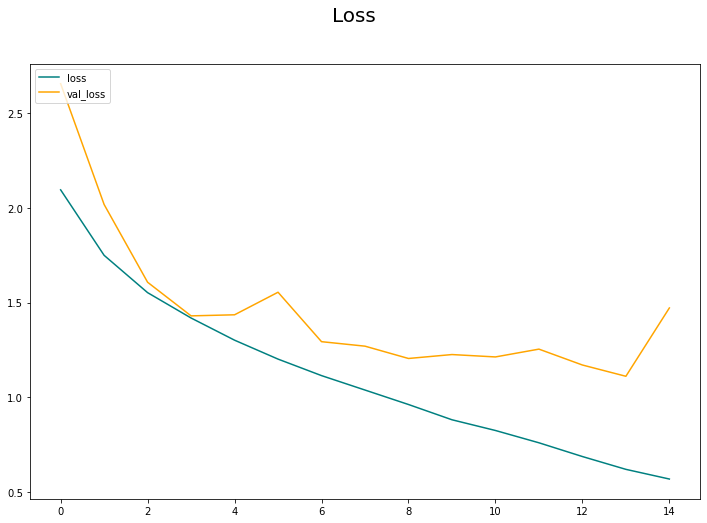

In [42]:
fig = plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],color='teal',label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [43]:
fig.savefig('visualizations/model_loss_v3.png')

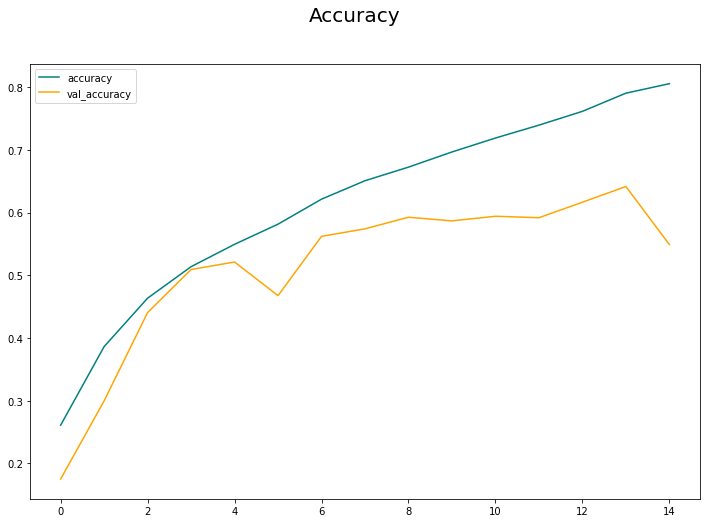

In [44]:
fig = plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [45]:
fig.savefig('visualizations/model_accuracy_v3.png')